## **Exploratory Data Analysis** - **sales data exploration**
### *Part 1* 

### Set up imports for access to Pandas, Matplotlib, and My SQL Connector Python libraries for Part 1 and scikit-learn for Part 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

### Connect to my remote data source

In [2]:
sales_db = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", password="D3v$tudent", use_pure=True)

### Query my database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable

In [3]:
joinquery = """SELECT sales.Invoice_ID,
    sales.Customer_Type,
    sales.Product_Line,
    sales.Unit_Price,
    sales.Quantity,
    sales.Total,
    sales.Gross_Income,
    sales.Rating,
    cities.City
    FROM sales
    JOIN cities
    ON sales.City_ID = cities.City_ID
    """
joined_sales_df = pd.read_sql(joinquery,sales_db)
joined_sales_df.head()

C:\Users\16306\AppData\Local\Temp\ipykernel_15184\3162691381.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_sales_df = pd.read_sql(joinquery,sales_db)


,Invoice_ID,Customer_Type,Product_Line,Unit_Price,Quantity,Total,Gross_Income,Rating,City
0,101-17-6199,Normal,Food and beverages,45.79,7,336.5565,16.0265,7.0,Seattle
1,101-81-4070,Member,Health and beauty,62.82,2,131.9220,6.2820,4.9,Milwaukee
2,102-06-2002,Member,Sports and travel,25.25,5,132.5625,6.3125,6.1,Milwaukee
3,102-77-2261,Member,Health and beauty,65.31,7,480.0285,22.8585,4.2,Milwaukee
4,105-10-6182,Member,Fashion accessories,21.48,2,45.1080,2.1480,6.6,Seattle


### Data cleaning and wrangling steps for my DataFrame:
- Exploring the information of the joined DataFrame
- Checking for and removing null values, if necessary
- Checking for and removing duplicate rows, if necessary
- Converting any necessary columns to Pandas DateTime format


In [4]:
#remove nulls
joined_sales_df.info()
#no nulls to remove since Sales_Tax column was not included in df creation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Product_Line   1000 non-null   object 
 3   Unit_Price     1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Total          1000 non-null   float64
 6   Gross_Income   1000 non-null   float64
 7   Rating         1000 non-null   float64
 8   City           1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
#remove dupes
joined_sales_df.duplicated().sort_values()
#Everything returned lists "False" for duplicated value. No dupes to remove.

0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

In [6]:
#convert datetime
joined_sales_df.info()
#no datetime fields to convert since datetime columns were not included in df creation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Product_Line   1000 non-null   object 
 3   Unit_Price     1000 non-null   float64
 4   Quantity       1000 non-null   int64  
 5   Total          1000 non-null   float64
 6   Gross_Income   1000 non-null   float64
 7   Rating         1000 non-null   float64
 8   City           1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


### Explore my DataFrame to examine the spread of values across categories.  I will utilize this exploration to answer the following questions:
- How many sales were made for members vs. normal customers?
- How many sales were made at each store location?
- How many sales were made for each product line?
- What is the overall average rating, based on all sales records?


Exploration Question 1 - How many sales were made for members vs. normal customers?
- Members had 501 sales
- Normal customers had 499 sales

In [7]:
#exploration1- How many sales were made for members vs. normal customers?
member_sales = joined_sales_df[joined_sales_df["Customer_Type"] == "Member"]
normal_sales = joined_sales_df[joined_sales_df["Customer_Type"] == "Normal"]

#member_sales.info() 
#normal_sales.info() 

### Question 1 Visualization - Members vs. Normal Customers

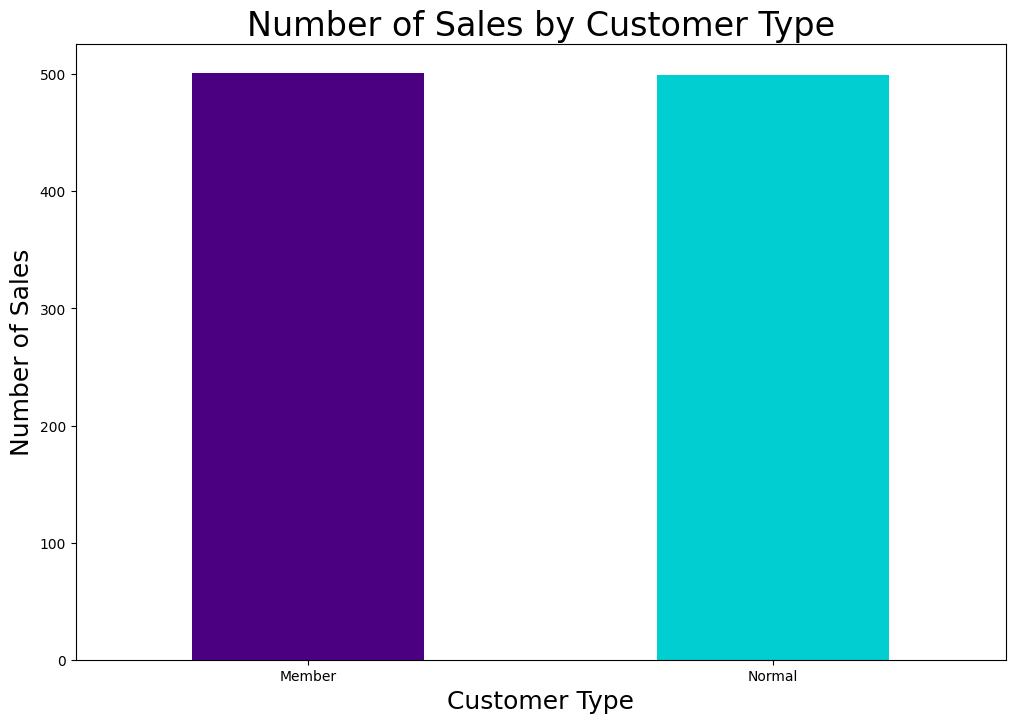

In [8]:
#viz1- How many sales were made for members vs. normal customers?
joined_sales_df.groupby("Customer_Type").size().plot(kind="bar", figsize= (12,8), color= ["#4b0082", "#00ced1"])
plt.title("Number of Sales by Customer Type", fontsize=24)
plt.xlabel("Customer Type", fontsize=18)
plt.ylabel ("Number of Sales", fontsize=18)
plt.xticks(rotation="horizontal");


Exploration Question 2 - How many sales were made at each store location?
- NYC had 332 sales
- Seattle had 340 sales
- Milwaukee had 328 sales

In [9]:
#exploration2- How many sales were made at each store location?
NYC_sales = joined_sales_df[joined_sales_df["City"] == "New York City"]
SEA_sales = joined_sales_df[joined_sales_df["City"] == "Seattle"]
MKE_sales = joined_sales_df[joined_sales_df["City"] == "Milwaukee"]

#NYC_sales.info() 
#SEA_sales.info() 
#MKE_sales.info() 

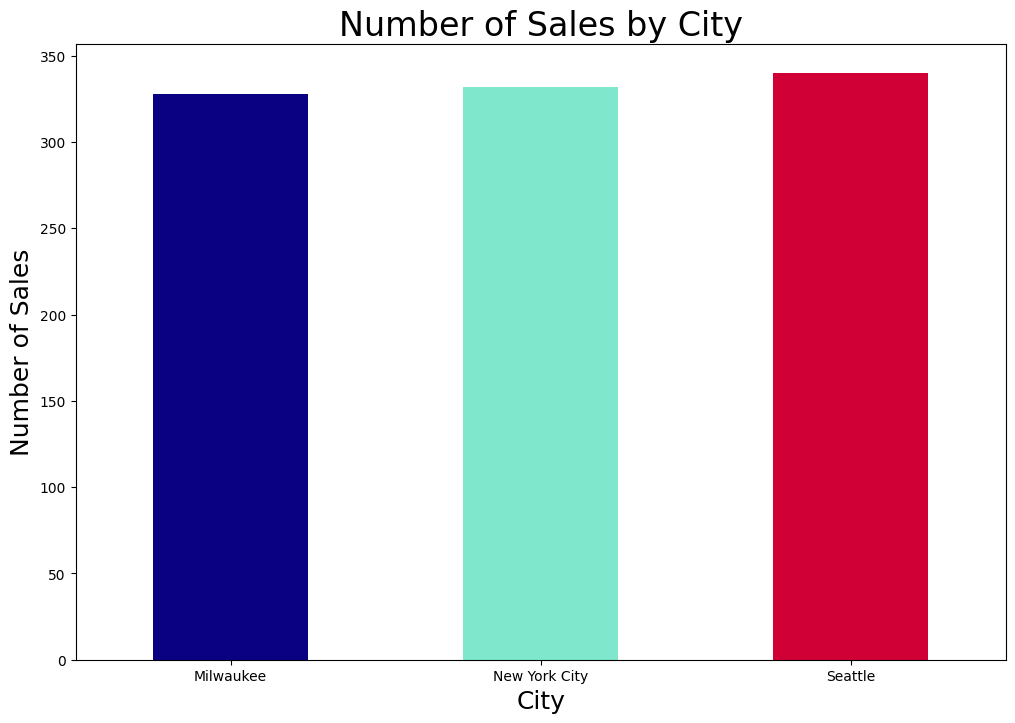

In [10]:
#viz2- How many sales were made at each store location?
joined_sales_df.groupby(joined_sales_df["City"]).size().plot.bar(figsize= (12,8), color= ["#0A0082", "#7fe7cc", "#d00037"])
plt.title("Number of Sales by City", fontsize=24)
plt.xlabel("City", fontsize=18)
plt.ylabel ("Number of Sales", fontsize=18)
plt.xticks(rotation="horizontal");

Exploration Question 3 - How many sales were made for each product line?
- Fashion accessories       178
- Food and beverages        174
- Electronic accessories    170
- Sports and travel         166
- Home and lifestyle        160
- Health and beauty         152

In [11]:
#exploration3- How many sales were made for each product line?
joined_sales_df["Product_Line"].value_counts()

Product_Line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

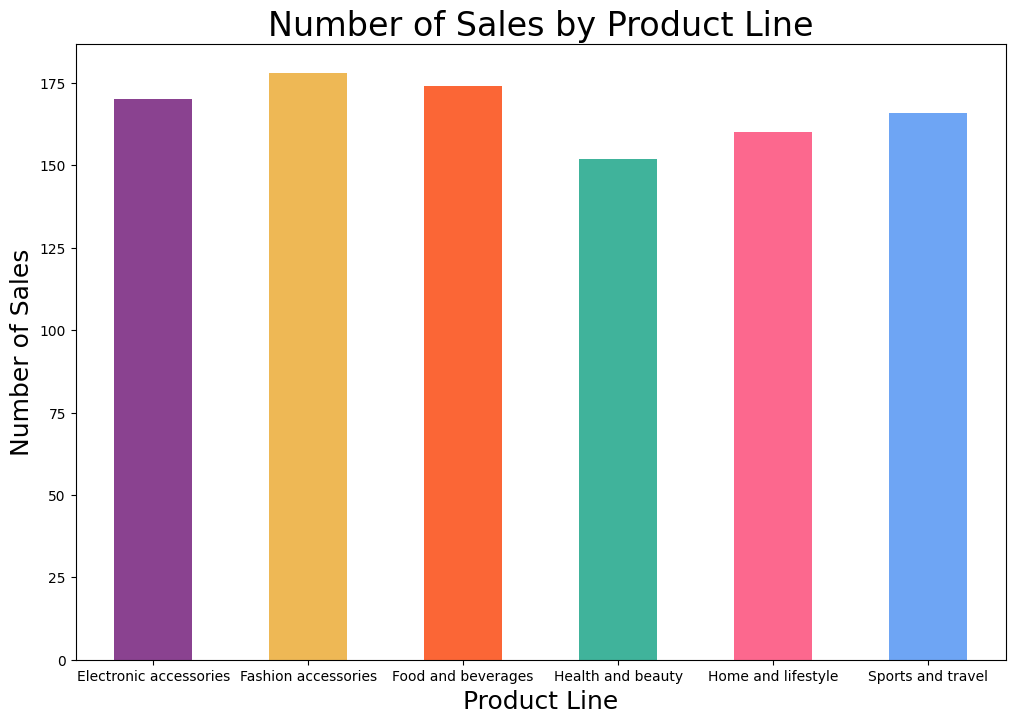

In [12]:
#viz3- How many sales were made for each product line?
joined_sales_df.groupby(joined_sales_df["Product_Line"]).size().plot.bar(figsize= (12,8), color= ["#8a4290", "#eeb855", "#fb6636", "#40b39b", "#fc688e", "#6ea5f4"])
plt.title("Number of Sales by Product Line", fontsize=24)
plt.xlabel("Product Line", fontsize=18)
plt.ylabel ("Number of Sales", fontsize=18)
plt.xticks(rotation="horizontal");

Exploration Question 4 - What is the overall average rating, based on all sales records?
- The overall average rating is 6.9727 for all sales

In [13]:
#exploration4
average_rating = "SELECT AVG (Rating) AS AverageRating FROM sales"
overall_rating = pd.read_sql_query(average_rating, sales_db)
overall_rating

C:\Users\16306\AppData\Local\Temp\ipykernel_15184\3486622166.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  overall_rating = pd.read_sql_query(average_rating, sales_db)


,AverageRating
0,6.9727


## **Exploratory Data Analysis** - **sales data exploration**
### *Part 2* 

### Describe numeric trends in my DataFrame, using the appropriate Pandas function


In [14]:
joined_sales_df.describe()

,Unit_Price,Quantity,Total,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,15.379369,6.97270
std,26.494628,2.923431,245.885335,11.708825,1.71858
min,10.080000,1.000000,10.678500,0.508500,4.00000
25%,32.875000,3.000000,124.422375,5.924875,5.50000
50%,55.230000,5.000000,253.848000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,22.445250,8.50000
max,99.960000,10.000000,1042.650000,49.650000,10.00000


### Explore the correlation between columns of my data set, using the appropriate Pandas function

In [15]:
joined_sales_df.corr(numeric_only=True)

,Unit_Price,Quantity,Total,Gross_Income,Rating
Unit_Price,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,-0.036442
Gross_Income,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


### Note the columns with the strongest correlation, and visualize those two columns using a Matplotlib Scatter Plot.  I will ensure my plot includes the following:
- A chart title
- An X-axis label
- A Y-axis label


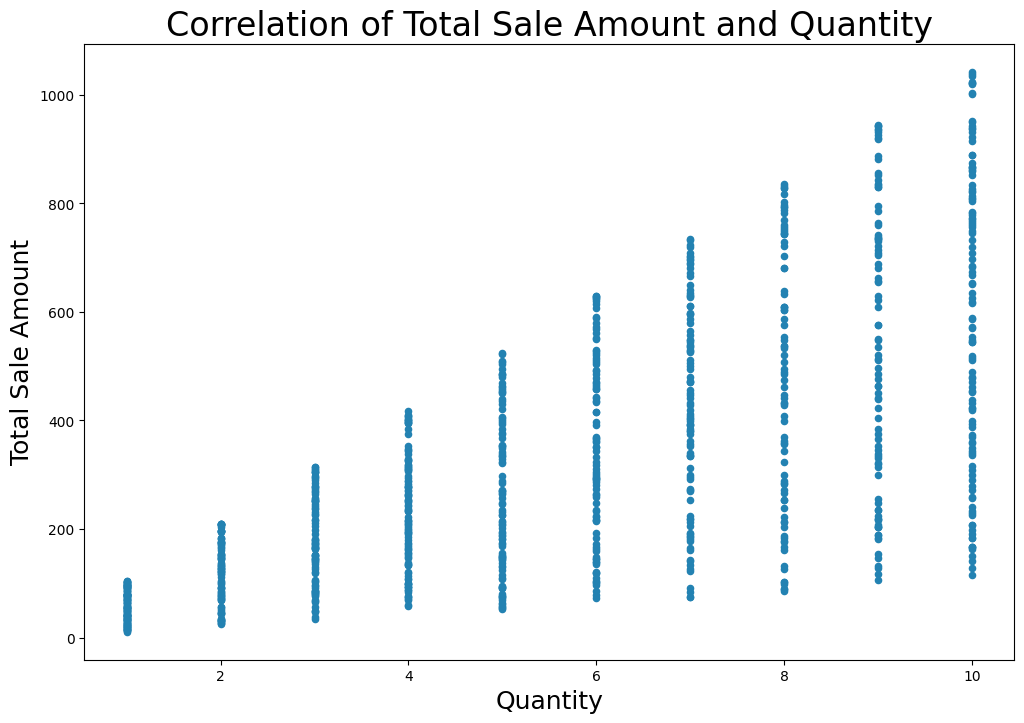

In [16]:
joined_sales_df.plot.scatter(x="Quantity", y="Total", figsize=(12,8), color="#2382B2")
plt.title("Correlation of Total Sale Amount and Quantity", fontsize=24)
plt.xlabel("Quantity", fontsize=18)
plt.ylabel ("Total Sale Amount", fontsize=18);

 ### Reshape my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable

In [17]:
x_reshape = joined_sales_df[["Quantity"]]
y_reshape = joined_sales_df["Total"]

### Create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.

In [18]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_reshape, y_reshape)
y_prediction = linear_regressor.predict(x_reshape)

### Create a visualization of my predictive model, and ensure I include the following stylizations:
- A chart title
- X-axis label
- Y-axis label
- A different color line for my predictive model

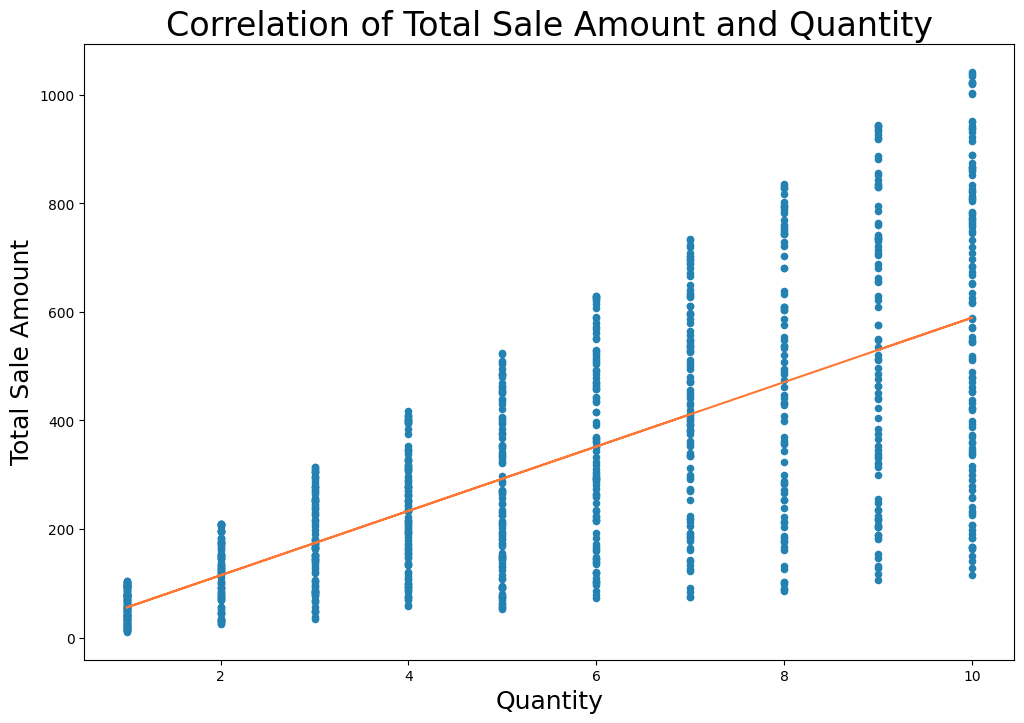

In [19]:
joined_sales_df.plot.scatter(x="Quantity", y="Total", figsize=(12,8), color="#2382B2")
plt.plot(x_reshape, y_prediction, color="#FF7733")
plt.title("Correlation of Total Sale Amount and Quantity", fontsize=24)
plt.xlabel("Quantity", fontsize=18)
plt.ylabel ("Total Sale Amount", fontsize=18);